# Exercício 6
## Arthur Magalhães - 12629595

## Exercício 1

- Qual é a verossimilhança dos dados?

In [2]:
set.seed(12629595) #inicialiando a seed com meu numero USP

#dados fornecidos
x = c(1.158, 2.220, 0.449, 0.491, 0.758, 0.018, 0.196, 1.461, 3.298, 1.891, 0.583, 0.745, 0.502, 1.065, 0.042, 1.525, 0.651, 0.479, 0.966, 0.795)

Vamos supor que os dados obdeçam uma distribuição exponencial: $P(x) \propto e^{-ax}, a>0$ . 

Primeiramente, devemos normalizar a função de densidade exponecial $P(x) = A e^{-ax}$, ou seja,  encontrar um valor de A que torne a integral da função entre $0<x<\infty$ igual à 1.

Temos então:

$\int_0^\infty A e^{-ax} dx = 1 \Rightarrow A\int_0^\infty  e^{-ax} dx  \Rightarrow  \frac{-A}{a} e^{-ax}|_0^\infty \Rightarrow  \frac{-A}{a}(0-1) = 1 \Rightarrow \qquad \therefore A=a$

portanto a função será: $P(x) = ae^{-ax}$


Para encontrarmos a verossimilhança temos que fazer então: $L(a) = \prod_{i=1}^n P(x|a) = a^n \prod_{i=1}^n e^{-ax_i}$

Agora temos que usar a propriedade da exponencial de que $e^x \cdot e^y = e^{x+y}$, generalizando e aplicando para o nosso caso temos:

$L(a) = a^n e^{-a \sum_{i=1}^n x_i}$


Para encontrarmos o n e a soma dos $x_i$ fazemos:

In [3]:
n = length(x)
s = sum(x)
n
s


[1] 20

[1] 19.293

Portanto temos que a função de verossimilhança é dada por:

$\therefore L(a) = a^{20} e^{-a\cdot 19.293}$

## Exercício 2

- Estime a por máxima verossimilhança.

Para estimar a, vamos encontrar a máxima verossimilhança encontrando o ponto crítico da função $L(a)$, ou seja, o ponto em que $\frac{dL(a)}{da} = 0$.

Temos então que:

$\frac{dL(a)}{da} = 0 \Rightarrow \frac{d}{da} (a^{20} e^{-a\cdot 19.293}) = 20\cdot a^{19}e^{-a\cdot 19.293}- a^{20}e^{-a\cdot 19.293}\cdot 19.293 = 0 \Rightarrow a = \frac{20}{19.293} = 1.0366$ 

In [4]:
amax = 20./19.293
amax

[1] 1.036645

## Exercício 3

- Estime o posterior de a
 por MCMC, assumindo um prior uniforme para a
. Lembre-se que a função proposta deve fornecer apenas  a>0

In [22]:
set.seed(12629595)

## Funcao log daverossimilhanca

logver = function(a) {(20*log(a)) - (19.293*a)}

# log do prior
logprior = function(a){ 
  logprior = dunif(a, min=0, max=5, log = TRUE)
return(logprior)}

#posterior (em log):
logposterior = function(a){logver(a) + logprior(a)}


# definição da função de teste, estabelecido já um sigma de 0,1 para o chute
# do parâmetro
funcao_proposta = function(a) {rnorm(1, mean=a, sd=0.1)}

In [29]:
# função que aplica o método de markov chain monte carlo
mcmc = function(xinicial, niteracoes) {
  # Inicia um array que receberá os valores de x testados
  cadeia = array(niteracoes+1)
  # Define o primeiro valor da cadeia
  cadeia[1] = xinicial
  # For que será usado para testar os valores de a gerados pela função de passos
  for (i in 1:niteracoes) {
    # Definição de x através da distribuição normal
    proposta = funcao_proposta(cadeia[i])
    # Cálculo da probabilidade através dos dois valores propostos
    probab = exp(logposterior(proposta) - logposterior(cadeia[i]))
    # Gera uma probabilidade aleatória
    runif1 = runif(1)
    # Testa se o valor encontrado é maior do que a probabilidade aleatória
    if (probab>runif1) {cadeia[i+1]=proposta}
    else {cadeia[i+1]=cadeia[i]}
  }
  # Retorna a cadeia de valores para o parâmetro
  return(cadeia)
}


# Função para realizar o plot em função do valor de sigma dado
mcmcplot <- function(prior) {
  # Resultado do MCMC para o valor de sigma dado
  y=mcmc(4,100000)
  x = seq(1, 100001, 1) # Estabelece os valores do eixo x para o plot
  titulo = paste('Cadeia MCMC - prior', prior) # Título do plot
  plot(x, y, type='l', col='cyan', ylab='x', xlab='Iterção',
   main=titulo) # Plot da cadeia para o prior estabelecido
  # plota uma linha no valor esperado de a 
  abline(h = 1.03664541543565, col="red",lwd=2)
  # Histogramas dos dados da cadeia
  hist(y,col='gold',main='distribuição do parâmetro',xlab='x',ylab='frequência')
  # plota uma linha no valor esperado de a 
  abline(v = 1.03664541543565, col="red",lwd=2)
  return(y)
}

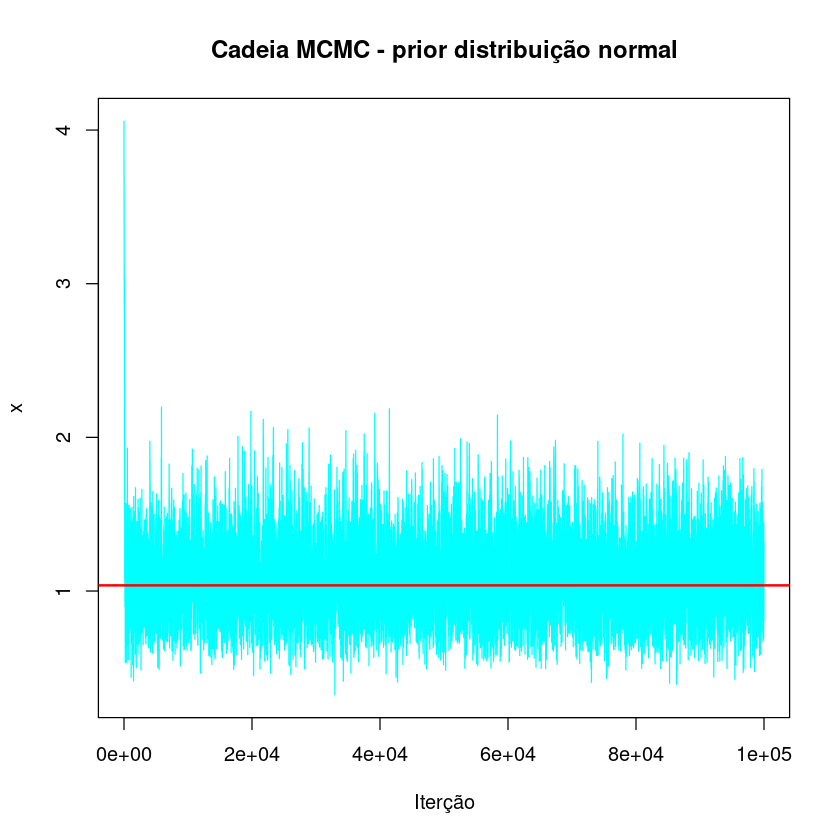

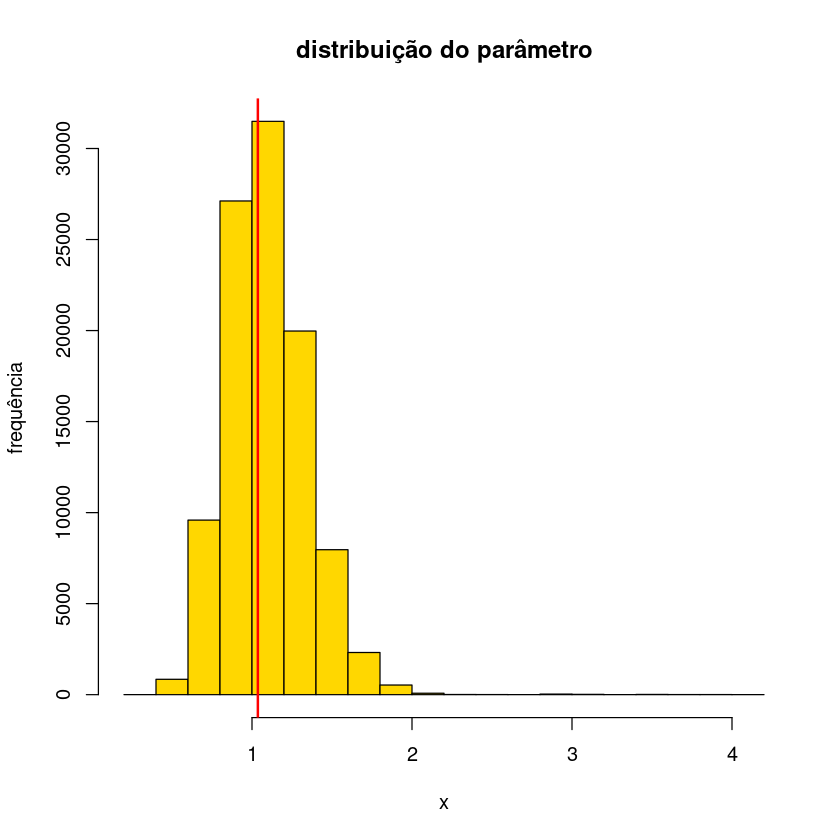

In [30]:
# saída para a o caso de um prior de distribuição normal
saida = mcmcplot('distribuição normal')

## Exercício 4

- Estime o posterior de a por MCMC, assumindo um prior gaussiano para a ,  N(μ=2,σ=2).

Como as funções necessárias para o cálculo da verossimilhança e do MCMC já foram feitas e utilizadas no exercício anterior, neste apenas devemos alterar o prior de normal para gaussiano (dunif -> dnorm). 

Temos então:

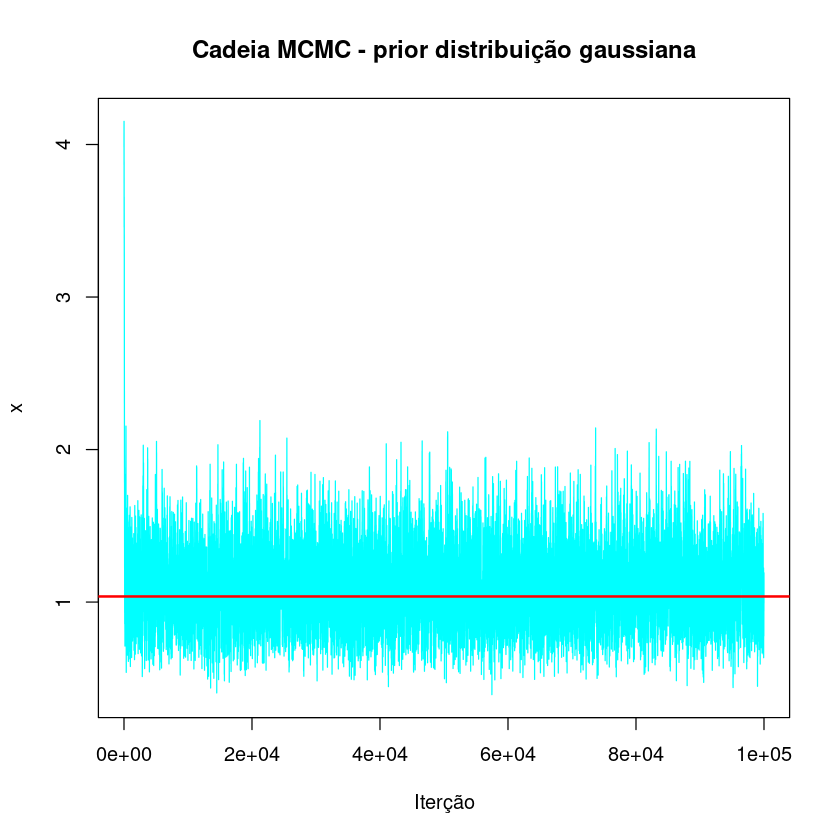

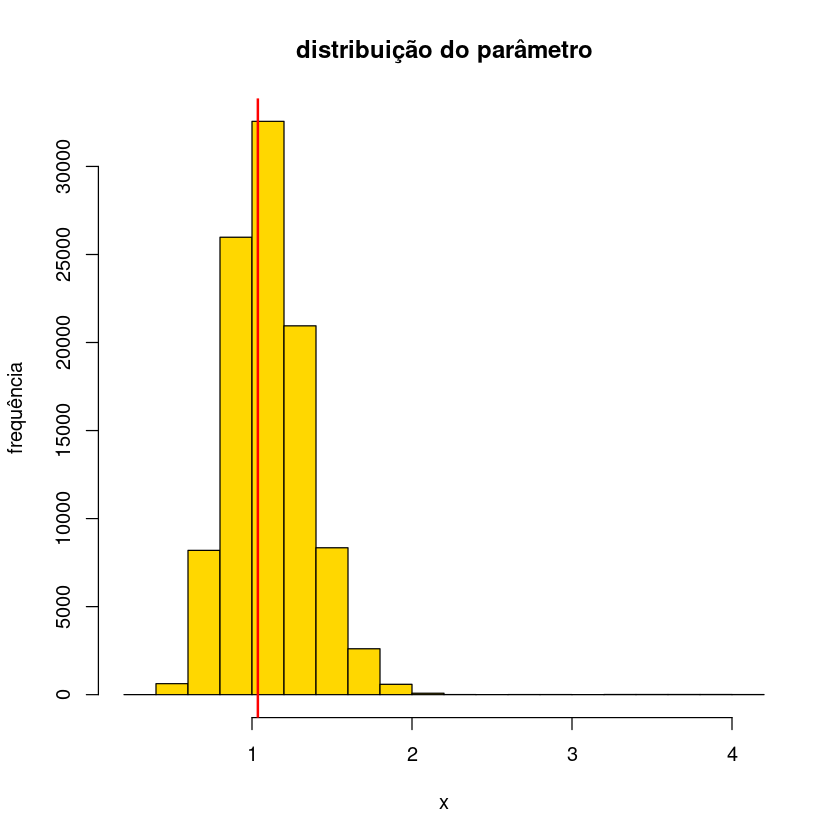

In [32]:
set.seed(12629595)

logprior = function(a)
    {logprior = dnorm(a, mean=2., sd=2.,log = TRUE) 
    
    return(logprior)}

# saída para a o caso de um prior de distribuição normal
saida_gauss = mcmcplot('distribuição gaussiana')

## Exercício 5

- Compare as medianas das cadeias nos dois casos depois de remover o burn-in (suponha que o burn-in corresponda às 100 primeiras iterações).

In [34]:
burnin = 10^3

mediana_unif = mean(saida[burnin:length(saida)])
mediana_gauss = mean(saida_gauss[burnin:length(saida_gauss)])

mediana_unif
mediana_gauss

[1] 1.09326

[1] 1.107328

Primeiramente foi consierado o burn-in como as primeiras 1000 iterações. Tirando a mediana dos dados com ambos priores, retirando as contagens de burn-in, chegamos aos resultados:

**Medianas**
- Uniforme: 1.09326
- Gaussiana: 1.10733

## Exercício 6

- Compare também o intervalo de credibilidade de 95% do parâmetro a depois de remover o burn-in.


In [47]:
# intervalo de de credibilidade de 95%:
s1=quantile(saida[burnin:length(saida)], probs = c(0.95))

# intervalo de de credibilidade de 95%:
s2=quantile(saida, probs = c(0.95))

# intervalo de de credibilidade de 95%:
s3=quantile(saida_gauss[burnin:length(saida_gauss)], probs = c(0.95))

# intervalo de de credibilidade de 95%:
s4=quantile(saida_gauss, probs = c(0.95))

cat("Intervalo de credibilidade de 95% para o prior: uniforme(",s2,"), uniforme sem burn-in(",s1,"), gaussiano(", s4,"),gaussiano sem burn-in(",s3,")")

Intervalo de credibilidade de 95% para o prior: uniforme( 1.525823 ), uniforme sem burn-in( 1.524172 ), gaussiano( 1.538966 ),gaussiano sem burn-in( 1.535248 )

## Exercício 7

- Comente como a diferença entre os priores afeta os resultados.

Como vimos no exercício anterior, tanto o prior **uniforme** quanto o prior **gaussiano** apresentaram resultados muito semelhantes. A conclusão que podemos tirar deste fato é a de que, se o dados fornecidos são de qualidade, a escolha do prior não afetará de forma significativa o resultado final, oque é de se esperar, confirmando ainda mais a efetividade da inferência bayesiana.